Q8

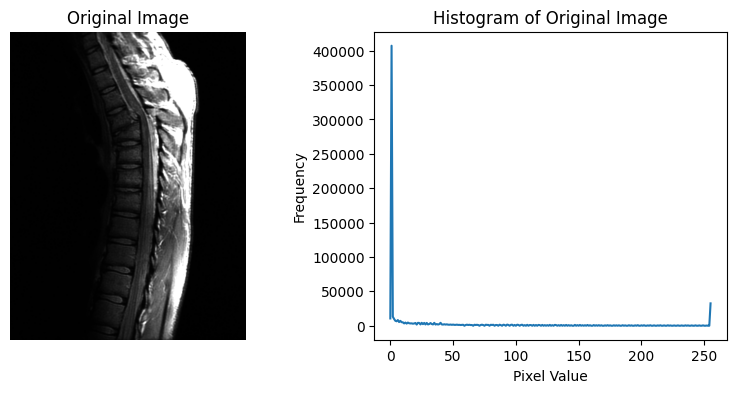

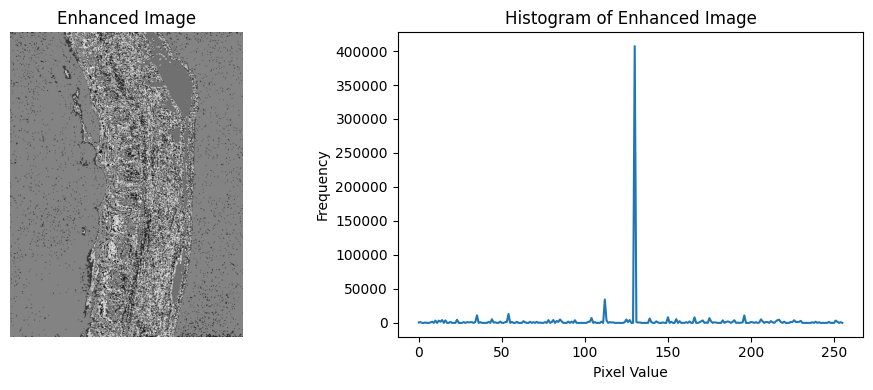

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# 計算圖片的直方圖(a)小題
def compute_histogram(image):

    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
    return histogram.flatten()

# 對圖片做histogram equalization
def histogram_equalization(image):
    #計算其直方圖
    histogram = compute_histogram(image)

    # 算他的CDF
    cdf = histogram.cumsum()
    cdf_normalized = cdf * histogram.max() / cdf.max()

    # pixel value mapping到cdf
    equalized_image = np.interp(image.flatten(), np.arange(256), cdf_normalized).reshape(image.shape)

    return equalized_image

image_path = "/content/Fig0308(a)(fractured_spine).tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

image = np.uint8(image)

# 原圖的直方圖
histogram_original = compute_histogram(image)
# 並且對圖做histogram equalization

equalized_image = histogram_equalization(image)
equalized_image = np.uint8(equalized_image)

# equalized image的直方圖
histogram_equalized = compute_histogram(equalized_image)

#以下繪圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')


ax2.plot(histogram_original)
ax2.set_title('Histogram of Original Image')
ax2.set_xlabel('Pixel Value')
ax2.set_ylabel('Frequency')


fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(10, 4))


ax3.imshow(equalized_image, cmap='gray')
ax3.set_title('Enhanced Image')
ax3.axis('off')


ax4.plot(histogram_equalized)
ax4.set_title('Histogram of Enhanced Image')
ax4.set_xlabel('Pixel Value')
ax4.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Q9  分別做中心為-4、-8兩種。

Enter the coefficient at position (1, 1): 0
Enter the coefficient at position (1, 2): 1
Enter the coefficient at position (1, 3): 0
Enter the coefficient at position (2, 1): 1
Enter the coefficient at position (2, 2): -4
Enter the coefficient at position (2, 3): 1
Enter the coefficient at position (3, 1): 0
Enter the coefficient at position (3, 2): 1
Enter the coefficient at position (3, 3): 0


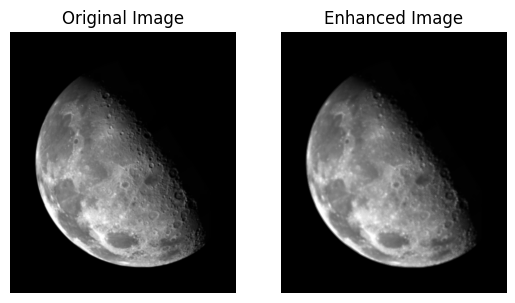

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "/content/Fig0338(a)(blurry_moon).tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def spatial_filtering(image, mask):
    filtered_image = cv2.filter2D(image, -1, mask)
    return filtered_image

# 建立一個3*3 mask，並且讓user自行輸入遮罩數值
laplacian_mask = np.zeros((3, 3), dtype=np.float32)
for i in range(3):
    for j in range(3):
        coefficient = float(input(f"Enter the coefficient at position ({i+1}, {j+1}): "))
        laplacian_mask[i, j] = coefficient

# 這裡負責做 Laplacian enhancement
def laplacian_enhancement(image, laplacian_mask):
    # Apply spatial filtering using the Laplacian mask
    enhanced_image = spatial_filtering(image, laplacian_mask)

    # Add the original image to the enhanced image to obtain the final result
    final_image = cv2.add(image, enhanced_image)

    return final_image


# 拿上面寫好的Laplacian enhancement function對圖片做增強
enhanced_image = laplacian_enhancement(image, laplacian_mask)

#把原圖和增強後的圖都秀出來
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

plt.show()
##

Enter the coefficient at position (1, 1): 1
Enter the coefficient at position (1, 2): 1
Enter the coefficient at position (1, 3): 1
Enter the coefficient at position (2, 1): 1
Enter the coefficient at position (2, 2): -8
Enter the coefficient at position (2, 3): 1
Enter the coefficient at position (3, 1): 1
Enter the coefficient at position (3, 2): 1
Enter the coefficient at position (3, 3): 1


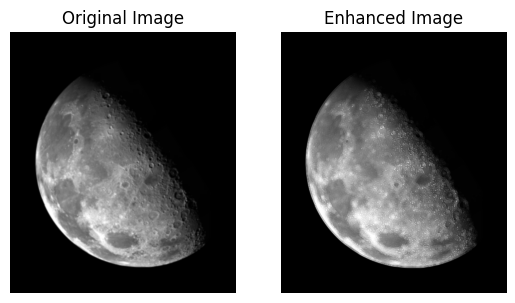

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def spatial_filtering(image, mask):
    filtered_image = cv2.filter2D(image, -1, mask)
    return filtered_image

def laplacian_enhancement(image, laplacian_mask):
    enhanced_image = spatial_filtering(image, laplacian_mask)
    final_image = cv2.add(image, enhanced_image)
    return final_image

image_path = "/content/Fig0338(a)(blurry_moon).tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

laplacian_mask = np.zeros((3, 3), dtype=np.float32)
for i in range(3):
    for j in range(3):
        coefficient = float(input(f"Enter the coefficient at position ({i+1}, {j+1}): "))
        laplacian_mask[i, j] = coefficient

enhanced_image = laplacian_enhancement(image, laplacian_mask)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

plt.show()


Q10

Enter the coefficient at position (1, 1): 1
Enter the coefficient at position (1, 2): 1
Enter the coefficient at position (1, 3): 1
Enter the coefficient at position (2, 1): 1
Enter the coefficient at position (2, 2): 1
Enter the coefficient at position (2, 3): 1
Enter the coefficient at position (3, 1): 1
Enter the coefficient at position (3, 2): 1
Enter the coefficient at position (3, 3): 1
Enter the value of k: 4.5


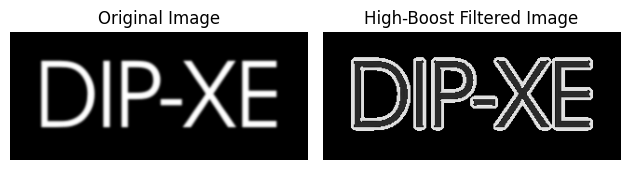

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/Fig0340(a)(dipxe_text).tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def spatial_filtering(image, mask):
    # 使用 filter2D 函數進行空間濾波
    filtered_image = cv2.filter2D(image, -1, mask)
    return filtered_image

# 建立一個 3x3 的遮罩，並由使用者輸入遮罩數值
laplacian_mask = np.zeros_like(image, dtype=np.float32)
mask_sum = 0.0  # 儲存遮罩係數的總和
for i in range(3):
    for j in range(3):
        coefficient = float(input(f"Enter the coefficient at position ({i+1}, {j+1}): "))
        laplacian_mask[i, j] = coefficient
        mask_sum += coefficient

# 將遮罩進行正規化
laplacian_mask /= mask_sum

# 計算平均化處理後的影像
averaged_image = spatial_filtering(image, np.ones((3, 3), dtype=np.float32) / float(mask_sum))

# 執行高增幅濾波
k = float(input("Enter the value of k: "))
boosted_image = image + k * (image - averaged_image)

# 顯示原始影像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 顯示高增幅濾波後的影像
plt.subplot(1, 2, 2)
plt.imshow(boosted_image, cmap='gray')
plt.title('High-Boost Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()